In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 7.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 14.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 12.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 15.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 14.2 MB/s eta 0:00:00

In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,save_model,load_model
from tensorflow.keras.layers import Dense,Dropout,Flatten,MaxPool2D,BatchNormalization,Conv2D,MaxPooling2D

In [93]:
from tensorflow.keras.datasets import cifar100

In [94]:
(X_train,y_train),(X_test,y_test)=cifar100.load_data()

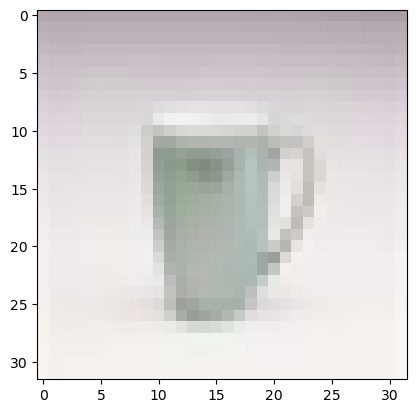

In [95]:
plt.imshow(X_train[7])
plt.show()

In [96]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


# Reshape the X_train and X_test image

In [150]:
X_train=X_train.reshape(-1,32,32,3)
X_test=X_test.reshape(-1,32,32,3)

In [151]:
X_train[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.76470588, 0.80392157, 0.75686275],
        [0.83137255, 0.87843137, 0.8       ],
        [0.71372549, 0.76078431, 0.65490196]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.66666667, 0.69019608, 0.58823529],
        [0.63137255, 0.65882353, 0.50980392],
        [0.57254902, 0.60392157, 0.44313725]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.74117647, 0.78039216, 0.6627451 ],
        [0.65098039, 0.69803922, 0.50980392],
        [0.4745098 , 0.52156863, 0.34117647]],

       ...,

       [[0.58039216, 0.7254902 , 0.30980392],
        [0.55686275, 0.71372549, 0.22352941],
        [0.54901961, 0

# Normalize the data set

In [152]:
X_train=X_train/255
X_test=X_test/255

In [153]:
X_train[0]

array([[[3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
        [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
        [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
        ...,
        [2.99884660e-03, 3.15263360e-03, 2.96808920e-03],
        [3.26028451e-03, 3.44482891e-03, 3.13725490e-03],
        [2.79892349e-03, 2.98346790e-03, 2.56824298e-03]],

       [[3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
        [3.90618993e-03, 3.90618993e-03, 3.90618993e-03],
        [3.90618993e-03, 3.90618993e-03, 3.90618993e-03],
        ...,
        [2.61437908e-03, 2.70665129e-03, 2.30680507e-03],
        [2.47597078e-03, 2.58362168e-03, 1.99923106e-03],
        [2.24529027e-03, 2.36831988e-03, 1.73779316e-03]],

       [[3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
        [3.90618993e-03, 3.90618993e-03, 3.90618993e-03],
        [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
        ...,
        [2.90657439e-03, 3.06036140e-03, 2.59900038e-03],
        [2.55286428e-03, 2.73

In [154]:
import glob

In [155]:
aa=np.unique(y_train)

In [156]:
aa.shape

(2,)

In [157]:
from tensorflow.keras.utils import to_categorical

In [158]:
num_class=100
y_train=to_categorical(y_train,num_classes=num_class)
y_test=to_categorical(y_test,num_classes=num_class)

# Model Building

In [159]:
model=Sequential()

# Model hyperparameter tuning

In [160]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [161]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [162]:
def model_tune(hp):
    model=Sequential([
        Conv2D(filters=hp.Int('conv_1_filter',min_value=64,max_value=128,step=16),
               kernel_size=hp.Choice('conv_1_kernal',values=[3,5]),
               activation='relu',
               input_shape=(32,32,3)),
        # MaxPooling2D(pool_size=(2,2)),
        Conv2D(filters=hp.Int('conv_2_filter',min_value=32,max_value=64,step=8),
               kernel_size=hp.Choice('conv_2_kernal',values=[3,5]),
               activation='relu'
              ),
        # MaxPooling2D(pool_size=(2,2)),
        Conv2D(filters=hp.Int('conv_3_filter',min_value=16,max_value=32,step=6),
               kernel_size=hp.Choice('conv_3_filter',values=[3,5]),
               activation='relu'
              ),
        Flatten(),
        Dense(units=hp.Int('dense_1_layer',min_value=64,max_value=128,step=16),activation='relu'),
        Dense(units=hp.Int('dense_2_layer',min_value=32,max_value=64,step=8),activation='relu'),
        Dense(100,activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    return model

In [163]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [164]:
from tensorflow import keras

In [165]:
def model_tuneone(hp):
    model_one = Sequential([
        Conv2D(
            filters=hp.Int('conv_1_filter', min_value=64, max_value=128, step=16),
            kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
            activation='relu',
            input_shape=(32, 32, 3),
            padding='same'  # Add padding to maintain spatial dimensions
        ),
        # MaxPooling2D(pool_size=(2, 2)),  # Adjusted pool size
        Conv2D(
            filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=8),
            kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
            activation='relu',
            padding='same'  # Add padding to maintain spatial dimensions
        ),
        # MaxPooling2D(pool_size=(2, 2)),  # Adjusted pool size
        Conv2D(
            filters=hp.Int('conv_3_filter', min_value=16, max_value=32, step=6),
            kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),
            activation='relu',
            padding='same'  # Add padding to maintain spatial dimensions
        ),
        Flatten(),
        Dense(units=hp.Int('dense_1_layer', min_value=100, max_value=128, step=16), activation='relu'),
        # Dense(units=hp.Int('dense_2_layer', min_value=32, max_value=64, step=8), activation='relu'),
        Dense(100, activation='softmax')  # Adjusted number of units to match the number of classes
    ])
    model_one.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                  loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy
                  metrics=['accuracy'])
    
    return model_one


In [166]:
tuner_search=RandomSearch(model_tune,objective='accuracy',max_trials=10,directory='output',project_name="cfar")

Reloading Tuner from output/cfar/tuner0.json


In [167]:
tuner_search.search(X_train,y_train,epochs=3)


Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
80                |64                |conv_1_filter
5                 |3                 |conv_1_kernal
32                |32                |conv_2_filter
5                 |3                 |conv_2_kernal
16                |22                |conv_3_filter
112               |96                |dense_1_layer
48                |64                |dense_2_layer
0.01              |0.01              |learning_rate
3                 |3                 |conv_1_kernel
3                 |3                 |conv_2_kernel
3                 |3                 |conv_3_kernel

Epoch 1/3


Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py", line 619, in sparse_categorical_crossentropy
    raise ValueError(
ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 100, 100), output.shape=(None, 100)


In [168]:
def build_model(hp):
  model_two = Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(32,32,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(100, activation='softmax')
  ])

  model_two.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  return model_two

In [169]:
tuner_search=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='output',project_name="Fashion")

Reloading Tuner from output/Fashion/tuner0.json


In [170]:
tuner_search.search(X_train,y_train,epochs=100,validation_split=0.1)


Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
32                |32                |conv_1_filter
3                 |3                 |conv_1_kernel
32                |32                |conv_2_filter
3                 |3                 |conv_2_kernel
96                |96                |dense_1_units
0.01              |0.01              |learning_rate

Epoch 1/100


Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/Applications/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py", line 619, in sparse_categorical_crossentropy
    raise ValueError(
ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 100, 100), output.shape=(None, 100)


# Just Build Own Model

In [171]:
cnn=Sequential()

In [172]:
cnn.add(Conv2D(128,3,3,padding='same',activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(64,3,3,padding='same',activation='relu'))
cnn.add(Flatten())

In [173]:
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(32,activation='relu'))
cnn.add(Dense(100,activation='softmax'))

In [174]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │         3,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 148,356 (579.52 KB)

 Trainable params: 148,356 (579.52 KB)

 Non-trainable params: 0 (0.00 B)

In [178]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [179]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 100, 100), output.shape=(None, 100)

In [ ]:
y_train=y_train.reshape(len(y_train),32,32,3)

In [177]:
X_train.shape

(50000, 32, 32, 3)